# Predicting Alertness Of The Driver

# Importing Libraries

In [ ]:
!pip install opendatasets jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The goal o this project is to predict whether a driver is alert or not on the basis of different physiological, environmental, and vechicular data. The columns p1 to p7 indicate physiological data, E1 to E11 indicate environmental data, and V1 to v11 indicate vehicular data.

In [ ]:
# Let's import all our fundamental libraries
import pandas as pd
import numpy as np
import jovian
import os
import opendatasets as od

## Downloading the Data

Dataset source: https://www.kaggle.com/c/stayalert/data


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Colab.

In [ ]:
od.download('https://www.kaggle.com/c/stayalert/data')

Skipping, found downloaded files in "./stayalert" (use force=True to force download)


The dataset is downloaded and extracted to the folder `stayalert`.

In [ ]:
os.listdir('stayalert')

['fordTrain.csv', 'fordTest.csv', 'Solution.csv', 'example_submission.csv']

Lets load `fordTrain.csv` file into pandas dataframe

In [ ]:
train_df = pd.read_csv('stayalert/fordTrain.csv')
train_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


Lets load `fordTest.csv` file into pandas dataframe

In [ ]:
test_df = pd.read_csv('stayalert/fordTest.csv')
test_df

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.94350,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.32120,1000,60.0000,0.302277,508,118.1100,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.51400,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.26150,1000,60.0000,0.302277,508,118.1100,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.36660,1000,60.0000,0.302277,504,119.0480,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,99,1206,?,37.3798,17.40260,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,99,1207,?,37.1653,5.37419,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,99,1208,?,36.9131,9.26657,892,67.2646,0.131030,752,79.7872,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,99,1209,?,36.6297,10.41710,892,67.2646,0.131030,752,79.7872,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


Lets load `Solution.csv` file into pandas dataframe

In [ ]:
solution_df = pd.read_csv('stayalert/Solution.csv')
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


Here, our training dataset contains 604329  rows and 33 columns. The dataset contains mostly numeric columns. Our objective is to create a model to predict the value in the column `IsAlert`.

Let's us check the data types and missing values in the various `columns` in the training dataset.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

We can clearly see that the total rows are 604329, and none of the columns have missing value. Hence, We will not have to perform the section of Imputing null values for this dataset respectively.

Furthermore, the different datatypes in the `training` datasets are mainly float64, and int64.

Lets check our `testing` set.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

We can also see that there are no missing values in any columns. Similarly, the datatypes are mainly float64 and int64.

# Exploratory Data Analysis and Visualization

It is always a good practice to  visually represent the relation between other feature columns and target columns. Lets explore the data from feature and target columns using different libraries like matplotlib, seaborn, and plotly.

In [ ]:
# Lets import our data visualization libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

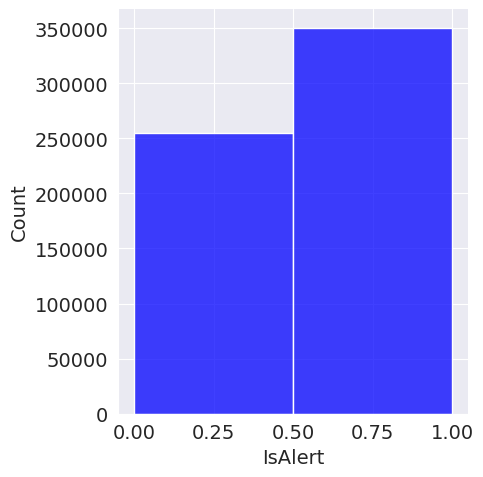

In [ ]:
# Presenting the total outcomes of IsAlert target column
sns.displot(x = train_df.IsAlert,bins = 2, color = 'blue');

Here, we can clearly see that the total number of values 0 (when the driver is not alert) is close to 250,000 whereas the total number of values 1 ( when the driver is  alert) is about 350,000 respectively.

<b> According to the dataset provided in Kaggle, the models that make less use of physiological features are said to be of additional Interest. </b>

So, from all the feature columns, lets check which columns has the highest average, and compare them with each other.

In [ ]:
# Using traditional for loop way to find out which Psychological feature column has the maximum mean
count = 0
coln = ''
for i in train_df[train_df.columns.tolist()[3:10]]:
  mean_value = train_df[i].mean()
  if (mean_value > count):
    count = mean_value
    coln = i

In [ ]:
coln

'P3'

Hence, the Psychological feature column with highest mean is P3. Thus, we will compare this particular feature column with the similar vechicular and environmental feature columns.

In [ ]:
# Lets see which Environmental feature column has the highest mean
train_df[train_df.columns.tolist()[11:22]].mean()

E1      10.512332
E2     102.790045
E3       0.290565
E4      -4.230136
E5       0.016262
E6     358.674738
E7       1.757296
E8       1.383058
E9       0.876787
E10     63.311256
E11      1.315265
dtype: float64

So, from the Environmental feature columns, we will use column E6 for comparision.

In [ ]:
# Lets see which Vehicular feature column has the highest mean
train_df[train_df.columns.tolist()[22:]].mean()

V1       76.965412
V2       -0.037710
V3      573.786433
V4       19.961030
V5        0.179814
V6     1715.688383
V7        0.000000
V8       12.710354
V9        0.000000
V10       3.312257
V11      11.668277
dtype: float64

So, from the Vehicular feature columns, we will use column V6 for comparision.

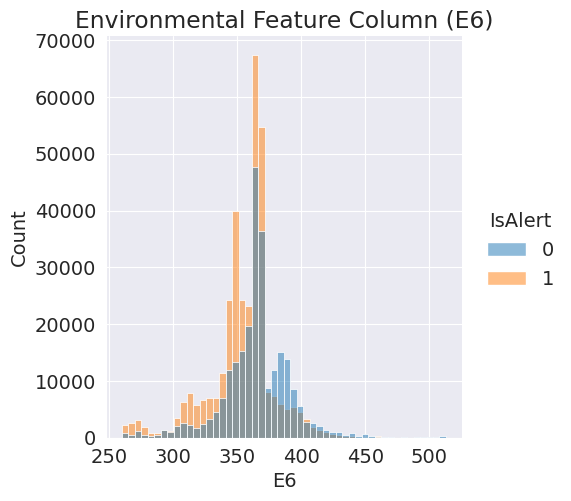

In [ ]:
sns.displot(data = train_df, x = 'E6', hue = 'IsAlert', bins = 50);
plt.title('Environmental Feature Column (E6)');

In the E6 Feature column from the above histogram, we can see that 1112 times the value of E6 ranging from 260-269 have the IsAlert column's value to be 0.

Similarly, we can also see that the above distribution is normal. In more than 120,000 rows when E6 columns value ranged from 360 -369, the driver was alert which is the highest number in the entire dataset for this particular feature.

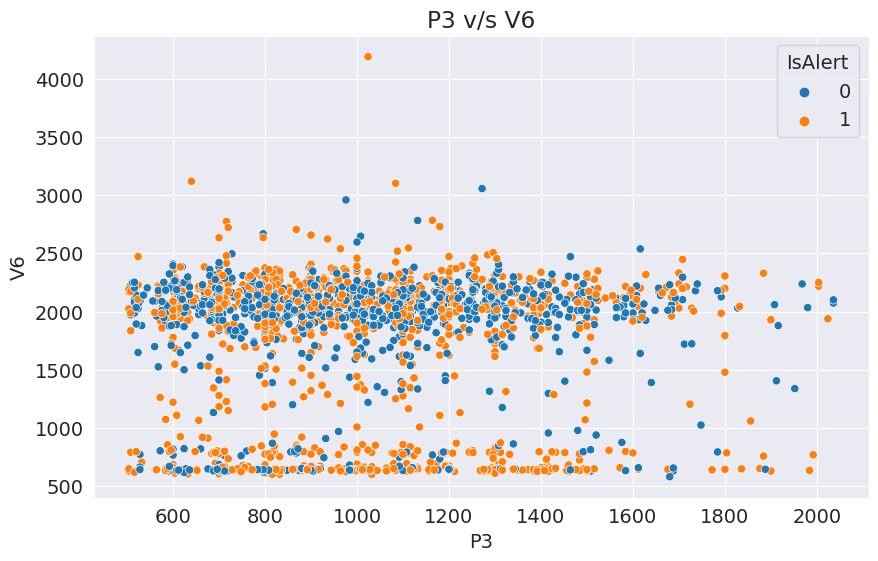

In [ ]:
# P3 vs V6 (using 2000 random samples out of more than 600,000 values)
sns.scatterplot(x = 'P3', y = 'V6', data = train_df[['P3','V6']].sample(2000, random_state = 42), hue = train_df.IsAlert)
plt.title('P3 v/s V6');

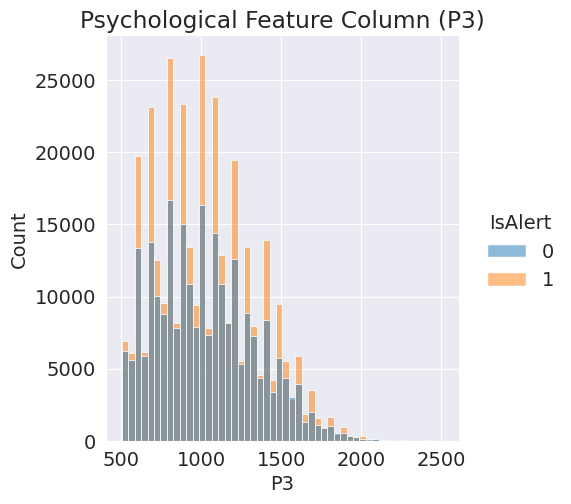

In [ ]:
# visualizing the distribution of medical charges in connection with region
fig = sns.displot(data = train_df,
                   x='P3',
                   hue='IsAlert',
                   bins=50)
plt.title('Psychological Feature Column (P3)');

From the above graph, we can make the following observations:

1. Most of the time the psychological feature P3 value was less than 1500.
2. For the feature P3, the total counts of  Psylogical value of the driver was higher when driver was alert.

In [ ]:
train_df.IsAlert.corr(train_df.P3)

0.005167867220705532

In [ ]:
train_df.IsAlert.corr(train_df.E6)

-0.18919786734413285

In [ ]:
train_df.IsAlert.corr(train_df.V6)

-0.244150113935766

Lets explain the correlation of feature columns `P3`, `E6`, and `V6`.

The absolute value of a correlation determines the strength. If a correlation between two variables is -1 or +1, the absolute value is 1, which indicates the perfect linear relationship.

Similarly, the sign of correlation coefficient determines the direction of the relationship.  ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/))

Thus, among the three feature columns, `V6` column is the most strongly correlated with `IsAlert` target column. However, the relationship is negative.

# Preprocessing and Feature Engineering

In [ ]:
train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
# Lets print a random sample of 5 rows from traiing dataframe
train_df.sample(5)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
491832,406,1059,1,41.8120,6.27982,616,97.4026,0.107678,616,97.4026,0,0.043,219.045,0,0,0.015812,366,0,0,1,72,0.0,0.00,-0.07,240,0.00000,0,648,0,0.0,0,1,16.45860
479193,396,496,1,34.3353,11.36550,908,66.0793,0.092110,652,92.0245,0,6.617,95.508,0,-52,0.015875,392,2,2,1,53,0.0,20.50,0.07,1008,3.01875,0,1656,0,0.0,0,1,12.16280
63510,52,670,0,31.0747,10.10830,904,66.3717,0.083029,748,80.2139,0,29.262,186.513,0,-6,0.015875,342,1,1,1,63,0.0,103.14,0.00,767,3.01875,0,2009,0,0.0,0,4,9.90299
214783,177,860,1,42.8454,8.69336,1272,47.1698,0.112867,1008,59.5238,0,30.786,342.906,0,-14,0.015686,335,1,2,1,69,0.0,116.57,0.00,240,4.50625,0,2271,0,7.3,0,4,9.59598
60877,50,447,0,46.8255,22.86100,1008,59.5238,0.079137,724,82.8729,0,28.186,141.681,0,28,0.015875,388,8,9,0,97,0.0,102.43,0.00,1008,3.01875,0,1993,0,28.0,0,4,10.06040


In [ ]:
# Lets make a copy of our original train_df dataframe, and test_df dataframe
train_new_df = train_df.copy()
test_new_df = test_df.copy()

From our `training` and `testing` dataframes, the TrailID and ObsNum columns may not be very useful for predicting the drivers alertness. So, lets remove these columns from our new copies of tbe train_df and test_df.

In [ ]:
# Lets select the columns to be removed
cols_tobe_removed = (train_df.columns.tolist())[0:2]
cols_tobe_removed

['TrialID', 'ObsNum']

In [ ]:
train_new_df.drop(columns = cols_tobe_removed,axis = 1,inplace = True)

In [ ]:
test_new_df.drop(columns = cols_tobe_removed,axis = 1, inplace = True)

In [ ]:
train_new_df.shape

(604329, 31)

In [ ]:
test_new_df.shape

(120840, 31)

In [ ]:
train_new_df.describe()

,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
test_new_df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.0,120840.000000,120840.0,120840.000000,120840.000000
mean,35.450222,12.008451,1026.668355,64.148812,0.122339,707.701456,86.174020,0.0,10.648237,98.202840,0.191154,-0.572095,0.015950,347.686395,1.358284,1.614176,0.868032,68.655238,1.770682,78.696121,-0.036024,562.097443,32.215433,0.179394,1732.128037,0.0,12.838320,0.0,3.378633,13.899704
std,3.303869,4.351161,310.874514,19.995102,0.113811,90.398496,11.024309,0.0,13.950893,125.644623,0.776454,26.663652,0.002584,47.971289,2.376400,1.537636,0.338457,17.456849,6.030855,42.534170,0.392249,300.358571,97.893439,0.383684,594.847283,0.0,12.315979,0.0,1.213857,1.504704
min,17.776300,-25.911800,504.000000,25.996500,0.040217,468.000000,49.342100,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.605000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,9.538220
25%,33.456300,9.600658,788.000000,49.180300,0.089515,636.000000,76.923100,0.0,0.000000,0.000000,0.000000,-6.000000,0.014804,303.000000,0.000000,0.000000,1.000000,65.000000,0.000000,56.540000,-0.175000,255.000000,1.487500,0.000000,1489.000000,0.0,0.000000,0.0,4.000000,12.775275
50%,34.877800,11.288900,1000.000000,60.000000,0.101191,700.000000,85.714300,0.0,0.000000,0.000000,0.000000,0.000000,0.015875,356.000000,1.000000,2.000000,1.000000,71.000000,0.000000,101.800000,0.000000,497.000000,3.018750,0.000000,2015.000000,0.0,12.300000,0.0,4.000000,13.470900
75%,36.862200,13.542925,1220.000000,76.142100,0.115462,780.000000,94.339600,0.0,28.541000,211.328000,0.000000,6.000000,0.017387,367.000000,2.000000,3.000000,1.000000,77.000000,0.000000,107.650000,0.070000,767.000000,5.993750,0.000000,2123.000000,0.0,22.800000,0.0,4.000000,15.223900
max,81.819600,39.757300,2308.000000,119.048000,4.667770,1216.000000,128.205000,0.0,64.693000,359.999000,4.000000,254.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,36.800000,122.650000,3.115000,1023.000000,478.494000,1.000000,3408.000000,0.0,82.100000,0.0,7.000000,18.322500


In the `train_new_df` and `test_new_df` DataFrames, different feature columns have values in different ranges. In the training dataframe, columns P1 and P2 have minimum values and means to be 22.481200,	-45.629200, 35.449020,	11.996525. When compared to another feature column P3, its minimum value is 504 and mean is 1026.671035 which are way higher than the minimum value and mean of previous columns.

This pattern also follows in different columns of both testing and training dataframes. When we pass the feature and target columns to models, the models ultimately get trained with numbers as scikitlearn only works with numeric values. This may result in columns with higher values to have higher importances or weights in descision making which may result in false predictions.

Hence, It is the best practice to convert or bring the values of all feature columns in a same range like (0,1) or (-1,1) respectively. We can do so by using the process called `scaling`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

The `StandardScaler` scales or transforms the values in the numeric column such that they have a mean 0, and standard deviation 1

In [ ]:
numeric_feature_cols = train_new_df.columns.tolist()[1:]
numeric_feature_cols

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

Since, the dataset provider in `kaggle` has mentioned that the models which make the use of least number of `Psychological` columns will be most favoured, we will drop all the `Psychological` columns other than the one that has the maximum mean that is `P3`.

In [ ]:
del numeric_feature_cols[0:8]
numeric_feature_cols.insert(0,'P3')

In [ ]:
numeric_feature_cols

['P3',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11']

In [ ]:
# Lets scale our numeric columns using StandardScaler
scaler.fit(train_new_df[numeric_feature_cols])

StandardScaler()

In [ ]:
# The calculated mean for each column after scaling using StandardScaler
list(scaler.mean_)

[1026.6710351480733,
 10.512332350425016,
 102.79004483650462,
 0.2905652384710977,
 -4.230136233740231,
 0.016262422963319655,
 358.6747384289021,
 1.7572961085766197,
 1.3830579038900996,
 0.8767873128709693,
 63.31125595495169,
 1.3152650294789754,
 76.96541183692989,
 -0.03770957541339237,
 573.7864325557767,
 19.96102967853602,
 0.1798143064456612,
 1715.6883833143868,
 0.0,
 12.710354459243227,
 0.0,
 3.3122570652740477,
 11.66827714039869]

In [ ]:
# lets scale and transform our columns in the training and testing set

# for training set
train_new_df[numeric_feature_cols] = scaler.transform(train_new_df[numeric_feature_cols])

# for testing set
test_new_df[numeric_feature_cols] = scaler.transform(test_new_df[numeric_feature_cols])

<b> Now, Lets check our scaled training and testing set. </b>

In [ ]:
train_new_df[numeric_feature_cols].sample(3)

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
137519,-0.784638,-0.748259,-0.807726,-0.288786,0.513401,-0.031432,-0.499079,-0.265267,-0.238101,0.37487,0.248200,-0.25066,0.657503,0.093365,1.505344,-0.244269,-0.468227,0.670216,0.0,0.189874,0.0,0.553032,-0.407717
22117,-0.758771,1.397009,0.886125,-0.288786,0.231779,-0.113459,0.924281,-0.265267,-0.238101,0.37487,0.565811,-0.25066,0.719233,0.266677,-1.118540,-0.244269,-0.468227,0.710658,0.0,0.606105,0.0,0.553032,0.469512
580114,1.465767,-0.748259,-0.807726,-0.288786,0.006481,-0.113459,1.362238,0.085015,-0.859680,0.37487,-0.122347,-0.25066,-1.733963,-1.033165,-0.260667,0.609025,-0.468227,-1.746571,0.0,-1.102174,0.0,-1.859348,0.544665


In [ ]:
test_new_df[numeric_feature_cols].sample(3)

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
49295,0.896699,1.177920,0.427877,-0.288786,0.231779,-0.414224,-2.214411,-0.265267,-0.238101,0.374870,0.248200,-0.25066,0.319116,-0.079947,-1.068274,-0.291982,-0.468227,0.102417,0.0,1.291151,0.0,0.553032,0.142396
25471,-0.319037,1.296504,1.050601,-0.288786,4.230814,-1.043097,0.376835,0.435296,4.112953,-2.667592,1.942127,-0.25066,0.820389,-0.599884,1.505344,-0.291982,2.135718,0.798012,0.0,-1.102174,0.0,0.553032,0.165830
68199,-1.056239,-0.748259,-0.807726,0.705091,0.006481,0.652126,-3.601274,-0.615548,-0.859680,0.374870,0.354070,-0.25066,-0.674869,0.093365,-0.210401,-0.291982,-0.468227,-0.064202,0.0,-0.182999,0.0,-0.251094,0.064817


Now, the next step  is `Preparing the Training and Validation Set` where we will use the `TrainTestSplit` to split the training set into `Training` and `Validation` set respectively.


# Preparing the Training and Validation Set

In [ ]:
# lets access our training dataframe
train_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563106,0.526645,0.597205,-0.220759,-0.468227,0.468009,0.0,0.059802,0.0,0.553032,0.315280
1,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563557,1.219894,0.597205,-0.220759,-0.468227,0.471244,0.0,0.059802,0.0,0.553032,0.312512
2,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563331,0.786613,0.597205,-0.220759,-0.468227,0.477714,0.0,0.059802,0.0,0.553032,0.312582
3,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.563782,0.266677,0.597205,-0.220759,-0.468227,0.484185,0.0,0.059802,0.0,0.553032,0.311888
4,1.207100,-0.748259,-0.807726,0.705091,-0.444114,-0.168143,-1.265504,-0.265267,-0.238101,0.37487,-0.334088,-0.25066,0.565584,0.526645,0.597205,-0.220759,-0.468227,0.487420,0.0,0.059802,0.0,0.553032,0.312794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.327677,0.786613,-1.118540,-0.267780,-0.468227,0.138005,0.0,1.533952,0.0,0.553032,0.417037
604325,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.327677,0.786613,-1.118540,-0.267780,-0.468227,0.138005,0.0,1.533952,0.0,0.553032,0.416081
604326,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.328803,0.526645,-1.118540,-0.267780,-0.468227,0.136388,0.0,1.611995,0.0,0.553032,0.417108
604327,-0.732905,0.519228,0.937619,-0.288786,0.119130,0.050595,-1.338497,0.085015,0.383478,0.37487,0.036459,-0.25066,0.328803,0.526645,-1.118540,-0.267780,-0.468227,0.136388,0.0,1.611995,0.0,0.553032,0.418618


In [ ]:
# Using train test split to split the scaled training set into training and validation set

#importing TrainTestSplit
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_new_df[numeric_feature_cols], train_new_df['IsAlert'], random_state = 42, test_size = 0.2)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((483463, 23), (120866, 23), (483463,), (120866,))

<b>Here, our training dataset is extremely large and my system is taking very long to fit and predict through the dataset. So,
I have randomly selected 50,000 rows for the testing set and 10,000 for validation set. </b>

In [ ]:
# Lets join the X_train dataframe and y_train series
trainingSet = X_train.join(y_train)
trainingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
517921,1.026033,-0.748259,-0.807726,-0.288786,0.119130,0.980233,0.303842,-0.615548,-0.859680,0.374870,0.036459,4.399439,-0.974732,0.526645,-1.068274,-0.291982,-0.468227,-1.592893,0.0,-1.102174,0.0,-0.251094,0.503847,1
540287,-1.082106,-0.748259,-0.807726,-0.288786,0.119130,2.101267,0.267346,-0.615548,-0.859680,0.374870,0.830487,-0.250660,0.394588,0.526645,1.455078,-0.244269,-0.468227,0.220506,0.0,0.103160,0.0,0.553032,-0.006108,0
244957,1.853768,-0.748259,-0.807726,-0.288786,0.119130,-0.277513,-0.499079,0.085015,-0.238101,0.374870,0.089394,-0.250660,0.761362,-0.079947,-0.260667,-0.291982,-0.468227,0.743011,0.0,1.681367,0.0,0.553032,0.270053,1
374229,1.543367,1.334087,1.923399,-0.288786,-0.106168,1.034918,0.121360,0.085015,1.005057,0.374870,0.142329,-0.250660,0.716529,0.093365,-0.210401,-0.291982,-0.468227,0.662128,0.0,0.189874,0.0,0.553032,-0.435234,0
471795,0.185364,-0.748259,-0.807726,-0.288786,0.231779,-0.550936,-3.309303,-0.265267,-0.238101,0.374870,-0.016476,-0.250660,0.718332,0.526645,-1.118540,-0.291982,-0.468227,0.655657,0.0,-1.102174,0.0,0.553032,0.063448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-1.004505,-0.304101,0.702900,-0.288786,-0.725737,-0.058774,2.019174,2.186701,1.005057,-2.667592,1.942127,-0.250660,-0.666308,0.526645,0.597205,-0.220759,-0.468227,-1.372891,0.0,-1.102174,0.0,0.553032,-0.443651,0
259178,-0.034503,1.648343,1.752904,-0.288786,-0.218817,-0.113459,-0.207108,0.085015,-0.238101,0.374870,0.248200,-0.250660,0.877838,0.786613,1.455078,-0.220759,-0.468227,0.872424,0.0,-1.102174,0.0,0.553032,0.362862,1
365838,-0.357837,1.344052,-0.762440,-0.288786,-0.387790,-0.004090,0.267346,0.085015,-0.859680,0.374870,-1.075181,-0.250660,0.456318,0.266677,-1.118540,-0.315493,-0.468227,0.303007,0.0,0.814220,0.0,0.553032,-0.422174,0
131932,-0.319037,1.336934,0.824353,-0.288786,0.006481,-0.222828,-0.280100,-0.265267,-0.238101,0.374870,0.512876,-0.250660,0.542605,0.093365,0.597205,-0.220759,-0.468227,0.419479,0.0,0.554076,0.0,0.553032,-0.305589,0


In [ ]:
X_train = trainingSet.sample(50000, random_state = 42)[trainingSet.columns.tolist()[0:-1]]
X_train

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
191725,0.844966,1.449468,0.923246,-0.288786,0.119130,-0.168143,-0.462583,-0.265267,-0.238101,0.374870,0.407005,-0.25066,0.648717,-0.079947,-1.068274,-0.244269,-0.468227,0.608745,0.0,0.458690,0.0,0.553032,-0.168321
590126,-0.719971,0.298502,-0.062047,-0.288786,-0.387790,2.948879,-0.389590,0.085015,0.383478,0.374870,0.459941,-0.25066,-0.528880,1.219894,1.455078,-0.031292,-0.468227,-0.363470,0.0,0.059802,0.0,0.553032,0.498099
268311,-0.409571,-0.748259,-0.807726,3.686720,0.457077,-0.468909,-1.812950,-0.265267,1.005057,-2.667592,1.942127,-0.25066,0.575948,-0.079947,-1.118540,-0.244269,-0.468227,0.500362,0.0,-0.391114,0.0,0.553032,0.484077
110357,1.077766,-0.748259,-0.807726,-0.288786,-0.613088,0.023253,1.070267,2.186701,0.383478,-2.667592,1.730386,-0.25066,-0.272048,0.526645,-0.260667,-0.220759,-0.468227,0.193006,0.0,0.345961,0.0,0.553032,-0.456535
573149,0.288831,-0.748259,-0.807726,-0.288786,0.457077,-0.004090,0.084864,-0.265267,-0.238101,0.374870,0.565811,-0.25066,0.810025,-0.339916,-1.068274,-0.315493,-0.468227,0.781835,0.0,0.458690,0.0,0.553032,0.507289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291241,-0.474237,1.615316,0.461093,-0.288786,0.569726,-0.004090,0.048367,0.085015,-0.238101,0.374870,-0.122347,-0.25066,1.034866,0.266677,-1.068274,-0.291982,-0.468227,1.084338,0.0,-0.278385,0.0,0.553032,-0.250283
154381,-0.655305,-0.747761,0.734952,-0.288786,0.119130,0.460729,0.267346,-0.615548,-0.859680,0.374870,-1.181051,-0.25066,-1.733963,-0.859852,-1.118540,-0.149536,-0.468227,-1.728777,0.0,-1.102174,0.0,-1.859348,-0.203161
515172,-0.991572,-0.748259,-0.807726,-0.288786,0.513401,-0.086117,0.303842,-0.615548,1.005057,0.374870,-0.069412,-0.25066,0.232153,0.093365,-1.068274,-0.267780,-0.468227,-0.025379,0.0,0.779534,0.0,0.553032,0.456033
476038,-0.047436,1.550614,-0.183697,-0.288786,0.682374,0.324018,-3.126821,-0.265267,-0.238101,0.374870,0.459941,-0.25066,0.783216,0.526645,-0.260667,-0.220759,-0.468227,0.747864,0.0,1.117721,0.0,0.553032,0.138621


In [ ]:
y_train = trainingSet.sample(50000, random_state=42)['IsAlert']
y_train

191725    1
590126    1
268311    0
110357    0
573149    0
         ..
291241    1
154381    1
515172    1
476038    1
584962    1
Name: IsAlert, Length: 50000, dtype: int64

In [ ]:
validatingSet = X_val.join(y_val)
validatingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
551187,0.262964,1.551468,0.548411,-0.288786,0.344428,-0.004090,1.216253,0.435296,0.383478,0.37487,0.142329,-0.25066,0.704589,-0.079947,-1.068274,-0.291982,-0.468227,0.705805,0.0,0.831563,0.0,0.553032,-0.063343,0
155822,-0.409571,-0.742066,-0.652994,-0.288786,0.119130,0.870864,0.267346,-0.615548,0.383478,0.37487,-0.651699,-0.25066,-1.733963,-0.599884,-1.118540,-0.149536,-0.468227,-1.706130,0.0,-1.102174,0.0,-1.859348,-0.199969,1
186872,-0.306104,1.284048,0.935568,-0.288786,-0.556763,-0.250170,-0.061122,-0.265267,-0.238101,0.37487,0.301135,-0.25066,0.509487,-0.599884,0.647471,-0.267780,-0.468227,0.443744,0.0,-0.729301,0.0,0.553032,-0.145542,1
66220,0.159497,1.538229,0.526251,-0.288786,0.231779,-0.058774,-0.791050,-0.265267,-0.238101,0.37487,-0.016476,-0.25066,0.771275,0.266677,-0.260667,-0.267780,-0.468227,0.728452,0.0,-0.408457,0.0,0.553032,-0.238162,1
541241,0.857899,-0.748259,-0.807726,-0.288786,0.119130,-0.386882,1.909685,-0.615548,-0.859680,0.37487,0.248200,-0.25066,0.699182,-0.339916,1.505344,-0.315493,-0.468227,0.642716,0.0,0.571419,0.0,0.553032,-0.082187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70728,0.185364,-0.748259,-0.807726,-0.288786,0.288103,-0.222828,-0.718057,-0.265267,-0.238101,0.37487,0.459941,-0.25066,0.958943,0.093365,-0.260667,-0.244269,-0.468227,0.940366,0.0,-0.503843,0.0,0.553032,-0.268538,1
438945,-0.991572,-0.748259,-0.807726,-0.288786,-1.120008,1.636448,-1.849446,0.435296,-0.238101,0.37487,0.936358,-0.25066,0.667867,-0.079947,0.597205,-0.267780,-0.468227,0.584480,0.0,-0.408457,0.0,0.553032,0.166816,1
557129,-0.461304,1.577306,0.209738,-0.288786,-0.331465,0.788837,0.632310,0.085015,-0.859680,0.37487,0.301135,-0.25066,0.925600,-1.293133,1.505344,-0.291982,2.135718,1.115073,0.0,0.458690,0.0,0.553032,0.022510,0
449348,-1.107972,-0.747191,1.521092,-0.288786,0.119130,-0.113459,0.303842,-0.615548,-0.859680,0.37487,-0.916375,-0.25066,-1.733963,-0.599884,-0.260667,1.486532,2.135718,-1.725542,0.0,-1.102174,0.0,-0.251094,0.141309,1


In [ ]:
X_val = validatingSet.sample(20000, random_state = 42)[validatingSet.columns.tolist()[0:-1]]
X_val

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
417774,1.802035,0.495027,-0.271440,-0.288786,0.175454,-0.250170,-2.469885,0.085015,-0.859680,-2.667592,1.942127,-0.250660,-0.276554,0.093365,-0.210401,-0.291982,-0.468227,-1.198184,0.0,-1.102174,0.0,0.553032,-0.055784
15331,0.043097,1.239775,1.023797,-0.288786,0.795023,0.050595,1.471728,4.288388,2.869795,-2.667592,1.942127,-0.250660,0.445955,0.266677,-1.118540,-0.267780,-0.468227,0.325654,0.0,1.117721,0.0,0.553032,0.450135
396348,-0.150903,-0.747405,1.629281,-0.288786,0.231779,0.378703,0.449828,0.085015,0.383478,0.374870,-1.286922,-0.250660,-1.733963,0.266677,-1.118540,-0.126025,-0.468227,-1.502304,0.0,-1.102174,0.0,-1.859348,-0.621359
141203,1.000166,-0.748259,-0.807726,-0.288786,0.457077,-0.086117,0.011871,-0.265267,0.383478,0.374870,0.248200,-0.250660,0.536522,0.266677,1.455078,-0.244269,-0.468227,0.403302,0.0,-0.555872,0.0,0.553032,-0.453373
512975,-0.150903,-0.748259,-0.807726,-0.288786,0.119130,1.062260,-0.280100,-0.615548,-0.859680,0.374870,0.618746,-0.250660,-0.286918,2.693047,1.455078,-0.054803,-0.468227,1.634343,0.0,2.548513,0.0,-0.251094,0.529777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450748,-0.978639,-0.747547,0.593618,-0.288786,0.119130,-0.058774,0.303842,-0.615548,-0.859680,0.374870,-0.810505,-0.250660,-1.733963,-0.599884,-0.260667,1.486532,2.135718,-1.725542,0.0,-1.102174,0.0,-0.251094,-0.640820
75267,0.469898,-0.747761,-0.210116,-0.288786,3.216974,0.378703,0.267346,0.085015,0.383478,0.374870,0.036459,0.740344,-0.847667,-0.599884,-0.210401,-0.315493,-0.468227,-1.748189,0.0,-1.102174,0.0,-0.251094,-0.062115
339692,-1.030372,-0.748259,-0.807726,-0.288786,-1.176332,0.159964,0.267346,0.085015,-0.859680,0.374870,-1.392792,-0.250660,0.615148,0.093365,1.455078,-0.315493,-0.468227,0.545656,0.0,1.230450,0.0,0.553032,-0.662810
315885,-0.784638,-0.748259,-0.807726,-0.288786,0.119130,0.378703,0.267346,-0.615548,-0.859680,0.374870,-1.075181,-0.250660,-1.733963,0.266677,-1.068274,-0.315493,2.135718,-1.761130,0.0,-1.102174,0.0,-1.859348,-0.473697


In [ ]:
y_val = validatingSet.sample(20000, random_state = 42)['IsAlert']
y_val

417774    0
15331     0
396348    1
141203    1
512975    1
         ..
450748    1
75267     1
339692    0
315885    1
263249    1
Name: IsAlert, Length: 20000, dtype: int64

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 23), (20000, 23), (50000,), (20000,))

# ---------------------------------------------------------------------------------------------------------------

# Training with KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_jobs = -1) # by default, n_neighbors parameter is set to 5

Here, `X` is capital and `y` is small. This is because `X` represents feature matrix whereas `y` represents target or response vector.

In [ ]:
%%time
Knn.fit(X_train,y_train)

CPU times: user 11.4 ms, sys: 62 µs, total: 11.4 ms
Wall time: 11.4 ms


KNeighborsClassifier(n_jobs=-1)

In [ ]:
X_predictions = Knn.predict(X_train)

In [ ]:
# Lets check the accuracy for training set

from sklearn.metrics import accuracy_score
accuracy_score(y_train, X_predictions)

0.91228

The accuracy on the training set is calculated to be approximately 91.3 %. Lets calculate this for the validation set.

In [ ]:
%%time

# calculating predictions for validation set
val_pred = Knn.predict(X_val)

CPU times: user 10.1 s, sys: 24.8 ms, total: 10.1 s
Wall time: 6.3 s


In [ ]:
# lets check accuracy for validation set
n_5_accuracy = accuracy_score(y_val, val_pred)*100
n_5_accuracy

86.91499999999999

The accuracy measured for the validation set is 87 % approximately, which is very good. This also indicated that our model hasnot `overfitted` with the training set.

Lets tune the hyperparameters for our knn model and see if there is any improvement on our model.

## Hyperparameter Tuning for the KNN model

By default, our n_neighbors parameter is set to 5 in our KNN model. Let's check for which particular value of n_neighbors, our model will have maximum accuracy for both training set and validation set.

### Tuning the value of n_neighbors

<b><u> What if n_neighbors is set to 3, 4, 6, and 7? </u></b>

<b> When n_neighbors = 3? </b>

In [ ]:
%%time
Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3)
Knn.fit(X_train,y_train)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 12.8 ms


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
%%time
n_3_pred = Knn.predict(X_val)
n_3_pred

CPU times: user 10 s, sys: 28 ms, total: 10.1 s
Wall time: 5.52 s


array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
n_3_accuracy = accuracy_score(y_val,n_3_pred)*100
n_3_accuracy

87.41499999999999

<b> When n_neighbors = 4? </b>

In [ ]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 4)
Knn.fit(X_train,y_train)
n_4_pred = Knn.predict(X_val)
n_4_accuracy = accuracy_score(y_val,n_4_pred)*100
n_4_accuracy

CPU times: user 10.1 s, sys: 17.4 ms, total: 10.1 s
Wall time: 7.04 s


86.185

<b> When n_neighbors = 6? </b>

In [ ]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 6)
Knn.fit(X_train,y_train)
n_6_pred = Knn.predict(X_val)
n_6_accuracy = accuracy_score(y_val,n_6_pred)*100
n_6_accuracy

CPU times: user 10.2 s, sys: 56.5 ms, total: 10.2 s
Wall time: 5.56 s


86.435

<b> When n_neighbors = 7? </b>

In [ ]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 7)
Knn.fit(X_train,y_train)
n_7_pred = Knn.predict(X_val)
n_7_accuracy = accuracy_score(y_val,n_6_pred)*100
n_7_accuracy

CPU times: user 10.1 s, sys: 33.5 ms, total: 10.2 s
Wall time: 7.08 s


86.435

<b> When n_neighbors = 8? </b>

In [ ]:
%%time

Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 8)
Knn.fit(X_train,y_train)
n_8_pred = Knn.predict(X_val)
n_8_accuracy = accuracy_score(y_val,n_6_pred)*100
n_8_accuracy

CPU times: user 10.1 s, sys: 21.7 ms, total: 10.2 s
Wall time: 5.55 s


86.435

I also tried to calculate both training and validation prediction score for value of n_neighbors ranging from 1 to 30. I let my laptop run the predictions , and It was still running for 1 hour. So, I decided to do predictions for only n_neighbors = 3,4,5,6,7, and 8.

Lets vizualize the calculated validation accuracy for different n_neighbors values.

In [ ]:
score = [n_3_accuracy,n_4_accuracy,n_5_accuracy,n_6_accuracy,n_7_accuracy,n_8_accuracy]
score

[87.41499999999999, 86.185, 86.91499999999999, 86.435, 86.435, 86.435]

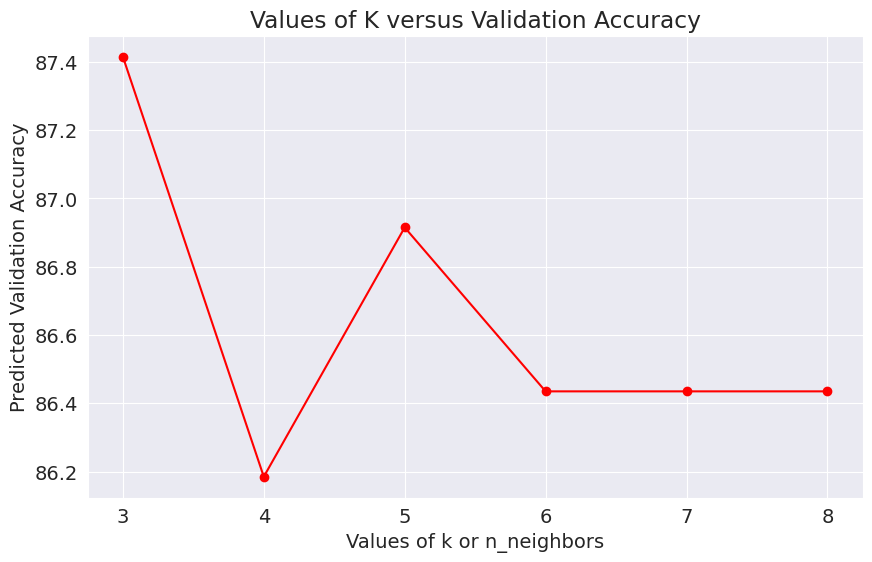

In [ ]:
# Plotting validation score V/S values of k
plt.plot(range(3,9), score, color = 'red', marker = 'o')
plt.xlabel('Values of k or n_neighbors')
plt.ylabel('Predicted Validation Accuracy')
plt.title('Values of K versus Validation Accuracy')
plt.show()

So, from the above results, research and conclusion, we can conlude that our best Knn model has n_neighbors value to be 3 respectively.

### Tuning the weights parameter

The weights parameter for our Knn model has two values: uniform and distance. By default, it is uniform. Lets check the accuracy when measured with weights parameter valued with distance value and n_neighbors value to be 3.

<b> When weights = uniform? </b>

In [ ]:
%%time
Knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3, weights = 'uniform')
Knn.fit(X_train,y_train)
n_3_pred = Knn.predict(X_val)
n_3_pred_accuracy = accuracy_score(y_val, n_3_pred)*100
n_3_pred_accuracy

CPU times: user 10.1 s, sys: 37.7 ms, total: 10.1 s
Wall time: 7.1 s


87.41499999999999

<b> When weights = distance? </b>

In [ ]:
%%time

Knn_weight = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1, weights = 'distance').fit(X_train, y_train)
weight_distance_accuracy = accuracy_score(y_val, Knn_weight.predict(X_val))
weight_distance_accuracy

CPU times: user 9.54 s, sys: 12.6 ms, total: 9.55 s
Wall time: 5.05 s


0.88685

we can see that, when `weights = distance`, our model performs better than when `weights = uniform`.

## Lets make the predictions on the Testing set

In [ ]:
# our testing set
test_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.455530
1,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.453587
2,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.452158
3,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.453396
4,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.679922,0.0,0.424004,0.0,0.553032,0.450718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.710983,0.0,-1.102174,0.0,-1.859348,0.504984
120836,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.504884
120837,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.715836,0.0,-1.102174,0.0,-1.859348,0.501330
120838,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.118540,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.499589


<b> We will use our optimized KNN model, that has hyperparameters tuned to n_neighbors = 3, and weights = distance. </b>

In [ ]:
%%time
testingSet = test_new_df[numeric_feature_cols]
testing_set_predictions = Knn_weight.predict(testingSet)

CPU times: user 58.4 s, sys: 68.8 ms, total: 58.5 s
Wall time: 34.8 s


In [ ]:
testing_set_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [ ]:
accuracy_score(solution_df['Prediction'], testing_set_predictions)

0.7400943396226415

In [ ]:
solution_df.Prediction.value_counts()/ len(solution_df.Prediction)

1    0.75245
0    0.24755
Name: Prediction, dtype: float64

We can clearly see that the model that we have developed isn't performing well. In the testing set, if a random row is selected, the chances of column prediction's value to be 1 is 75 %. And, out models accuracy is only 75%.

In [ ]:
# lets create a csv file and save our prediction for this model to be uploaded in kaggle
solution_Knn_df = solution_df.copy()
solution_Knn_df['Prediction'] = testing_set_predictions

In [ ]:
# saving out predictions to a new file called 'submission_knn.csv'
solution_Knn_df.to_csv('submission_knn.csv', index = False)

# We will now try another model: Logistic Regression

# ---------------------------------------------------------------------------------------------------------------

Logistic regression is a very popular technique to solve binary classification problems. This project is also a binary classification problem because the `Target` column has only 2 responses i.e 0 and 1 ,where 0 represents that the driver is not alert and 1 represents driver is alert.

In [ ]:
# To train our logistic regression model, lets import logistic regression class from sklearn library
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1)

For the logistic regression model, I will be using the original training and validation dataset.

In [ ]:
trainingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
517921,1.026033,-0.748259,-0.807726,-0.288786,0.119130,0.980233,0.303842,-0.615548,-0.859680,0.374870,0.036459,4.399439,-0.974732,0.526645,-1.068274,-0.291982,-0.468227,-1.592893,0.0,-1.102174,0.0,-0.251094,0.503847,1
540287,-1.082106,-0.748259,-0.807726,-0.288786,0.119130,2.101267,0.267346,-0.615548,-0.859680,0.374870,0.830487,-0.250660,0.394588,0.526645,1.455078,-0.244269,-0.468227,0.220506,0.0,0.103160,0.0,0.553032,-0.006108,0
244957,1.853768,-0.748259,-0.807726,-0.288786,0.119130,-0.277513,-0.499079,0.085015,-0.238101,0.374870,0.089394,-0.250660,0.761362,-0.079947,-0.260667,-0.291982,-0.468227,0.743011,0.0,1.681367,0.0,0.553032,0.270053,1
374229,1.543367,1.334087,1.923399,-0.288786,-0.106168,1.034918,0.121360,0.085015,1.005057,0.374870,0.142329,-0.250660,0.716529,0.093365,-0.210401,-0.291982,-0.468227,0.662128,0.0,0.189874,0.0,0.553032,-0.435234,0
471795,0.185364,-0.748259,-0.807726,-0.288786,0.231779,-0.550936,-3.309303,-0.265267,-0.238101,0.374870,-0.016476,-0.250660,0.718332,0.526645,-1.118540,-0.291982,-0.468227,0.655657,0.0,-1.102174,0.0,0.553032,0.063448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-1.004505,-0.304101,0.702900,-0.288786,-0.725737,-0.058774,2.019174,2.186701,1.005057,-2.667592,1.942127,-0.250660,-0.666308,0.526645,0.597205,-0.220759,-0.468227,-1.372891,0.0,-1.102174,0.0,0.553032,-0.443651,0
259178,-0.034503,1.648343,1.752904,-0.288786,-0.218817,-0.113459,-0.207108,0.085015,-0.238101,0.374870,0.248200,-0.250660,0.877838,0.786613,1.455078,-0.220759,-0.468227,0.872424,0.0,-1.102174,0.0,0.553032,0.362862,1
365838,-0.357837,1.344052,-0.762440,-0.288786,-0.387790,-0.004090,0.267346,0.085015,-0.859680,0.374870,-1.075181,-0.250660,0.456318,0.266677,-1.118540,-0.315493,-0.468227,0.303007,0.0,0.814220,0.0,0.553032,-0.422174,0
131932,-0.319037,1.336934,0.824353,-0.288786,0.006481,-0.222828,-0.280100,-0.265267,-0.238101,0.374870,0.512876,-0.250660,0.542605,0.093365,0.597205,-0.220759,-0.468227,0.419479,0.0,0.554076,0.0,0.553032,-0.305589,0


In [ ]:
validatingSet

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,IsAlert
551187,0.262964,1.551468,0.548411,-0.288786,0.344428,-0.004090,1.216253,0.435296,0.383478,0.37487,0.142329,-0.25066,0.704589,-0.079947,-1.068274,-0.291982,-0.468227,0.705805,0.0,0.831563,0.0,0.553032,-0.063343,0
155822,-0.409571,-0.742066,-0.652994,-0.288786,0.119130,0.870864,0.267346,-0.615548,0.383478,0.37487,-0.651699,-0.25066,-1.733963,-0.599884,-1.118540,-0.149536,-0.468227,-1.706130,0.0,-1.102174,0.0,-1.859348,-0.199969,1
186872,-0.306104,1.284048,0.935568,-0.288786,-0.556763,-0.250170,-0.061122,-0.265267,-0.238101,0.37487,0.301135,-0.25066,0.509487,-0.599884,0.647471,-0.267780,-0.468227,0.443744,0.0,-0.729301,0.0,0.553032,-0.145542,1
66220,0.159497,1.538229,0.526251,-0.288786,0.231779,-0.058774,-0.791050,-0.265267,-0.238101,0.37487,-0.016476,-0.25066,0.771275,0.266677,-0.260667,-0.267780,-0.468227,0.728452,0.0,-0.408457,0.0,0.553032,-0.238162,1
541241,0.857899,-0.748259,-0.807726,-0.288786,0.119130,-0.386882,1.909685,-0.615548,-0.859680,0.37487,0.248200,-0.25066,0.699182,-0.339916,1.505344,-0.315493,-0.468227,0.642716,0.0,0.571419,0.0,0.553032,-0.082187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70728,0.185364,-0.748259,-0.807726,-0.288786,0.288103,-0.222828,-0.718057,-0.265267,-0.238101,0.37487,0.459941,-0.25066,0.958943,0.093365,-0.260667,-0.244269,-0.468227,0.940366,0.0,-0.503843,0.0,0.553032,-0.268538,1
438945,-0.991572,-0.748259,-0.807726,-0.288786,-1.120008,1.636448,-1.849446,0.435296,-0.238101,0.37487,0.936358,-0.25066,0.667867,-0.079947,0.597205,-0.267780,-0.468227,0.584480,0.0,-0.408457,0.0,0.553032,0.166816,1
557129,-0.461304,1.577306,0.209738,-0.288786,-0.331465,0.788837,0.632310,0.085015,-0.859680,0.37487,0.301135,-0.25066,0.925600,-1.293133,1.505344,-0.291982,2.135718,1.115073,0.0,0.458690,0.0,0.553032,0.022510,0
449348,-1.107972,-0.747191,1.521092,-0.288786,0.119130,-0.113459,0.303842,-0.615548,-0.859680,0.37487,-0.916375,-0.25066,-1.733963,-0.599884,-0.260667,1.486532,2.135718,-1.725542,0.0,-1.102174,0.0,-0.251094,0.141309,1


In [ ]:
X_train_log_reg = trainingSet[numeric_feature_cols]

In [ ]:
y_train_log_reg = trainingSet['IsAlert']

In [ ]:
X_train_log_reg.shape, y_train_log_reg.shape

((483463, 23), (483463,))

In [ ]:
%%time

# Lets train our logistic regression model using fit() method
log_reg.fit(X_train_log_reg,y_train_log_reg)

CPU times: user 130 ms, sys: 143 ms, total: 274 ms
Wall time: 3.18 s


LogisticRegression(n_jobs=-1)

In [ ]:
log_reg.coef_

array([[ 2.91032842e-04,  6.42172153e-02, -1.00488959e-01,
         1.67310936e-01,  2.35467270e-03, -1.82015296e-01,
        -4.08708105e-01, -1.35190350e-01, -3.37463892e-01,
         1.05763279e+00,  1.36795793e-01, -1.04627128e-02,
        -6.97104932e-01, -7.41228054e-03, -1.26556747e-01,
        -2.68511432e-02, -2.31355911e-02,  2.58617315e-01,
         0.00000000e+00, -7.29493506e-02,  0.00000000e+00,
        -1.37860773e-01,  2.09789372e+00]])

Here, each value in the above list is a weight that is applied to the respective column in the training set. Similarly, lets check the intercept.

In [ ]:
log_reg.intercept_

array([0.38792004])

In [ ]:
%%time
# Lets make predictions on the training set
training_pred = log_reg.predict(X_train_log_reg)

CPU times: user 36 ms, sys: 8.99 ms, total: 45 ms
Wall time: 33.5 ms


<b> Lets measure the accuracy for training set. </b>

In [ ]:
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train_log_reg, training_pred) * 100

In [ ]:
training_accuracy

79.06396146137347

<b> Lets measure the accuracy for validation set. </b>

In [ ]:
X_train_vali = validatingSet[numeric_feature_cols]
y_train_vali = validatingSet['IsAlert']

In [ ]:
X_train_vali.shape,y_train_vali.shape

((120866, 23), (120866,))

In [ ]:
%%time
validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100

CPU times: user 29.1 ms, sys: 16.9 ms, total: 45.9 ms
Wall time: 31.8 ms


In [ ]:
validating_accuracy

78.92293945360979

Our training accuracy is 79.1 % whereas our validation accuracy is 78.95 %. Thus, we can make a conclusion that our model has not overfitted with the training set.

## Hyperparameter Tuning for the Logistic Regression model

### Lets tune the hyperparameter `max_iter`

By default, the hyperparameter max_iter is set to 100 for our logistic regression model. So, lets check our models performance for both training and validation set by tuning max_iter hyperparameter.

In [ ]:
%%time

training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in [50,75,100,150,200,250,300,350,400,450,500,750,1000]:
    log_reg = LogisticRegression(max_iter = i, n_jobs = -1)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100

    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)

    print("When max_iter is {}, the training accuracy is {} and validation accuracy is {}.".format(i, training_accuracy, validating_accuracy))

When max_iter is 50, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 75, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 100, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 150, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 200, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 250, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 300, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 350, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
When max_iter is 400, the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979.
Whe

<b> Visually representing the above calculations. </b>

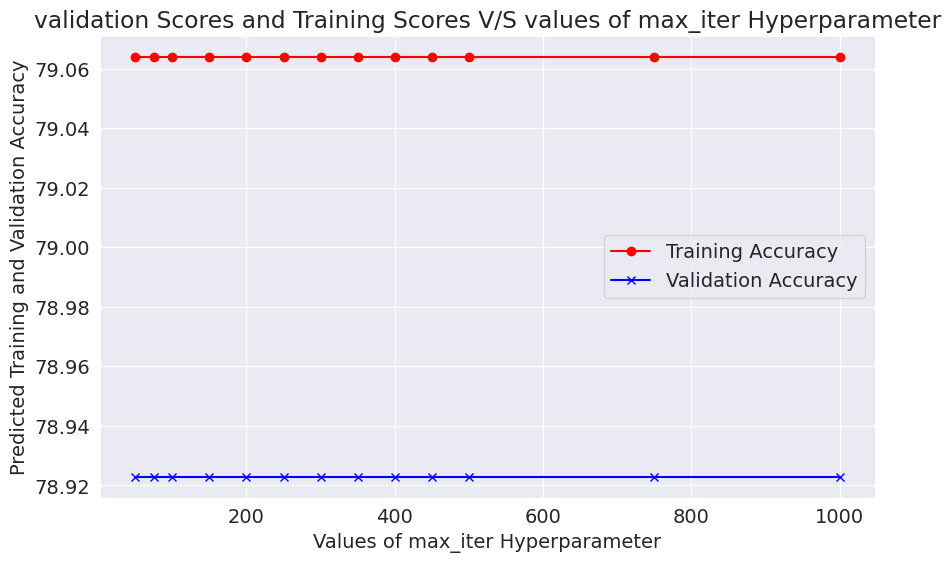

In [ ]:
# Plotting validation Scores and Training Scores V/S values of max_iter Hyperparameter
plt.plot([50,75,100,150,200,250,300,350,400,450,500,750,1000], training_accuracy_maxIterTuned, color = 'red', marker = 'o')
plt.plot([50,75,100,150,200,250,300,350,400,450,500,750,1000], validation_accuracy_maxIterTuned, color = 'blue', marker = 'x')
plt.xlabel('Values of max_iter Hyperparameter')
plt.ylabel('Predicted Training and Validation Accuracy')
plt.title('validation Scores and Training Scores V/S values of max_iter Hyperparameter')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Well, we can see that the change in hyperparameter max_iter doesnot result in change in the predictions. So, we will let the original value of max_iter be used in our model.

### Lets tune the hyperparameter `solver`

By default, our logistic regression model has the value of max_iter parameter set to `lbfgs`. But, we will check our model performance on both training and validation set by tuning the values of max_iter.

In [ ]:
# Hence, this is our optimized model
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100)

In [ ]:
%%time

solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in solver_list:
    log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, solver = i)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100

    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)

    print("When solver is "+i+" the training accuracy is "+str(training_accuracy)+" and validation accuracy is "+str(validating_accuracy)+" .")

When solver is newton-cg the training accuracy is 79.06396146137347 and validation accuracy is 78.92459417867721 .
When solver is lbfgs the training accuracy is 79.06396146137347 and validation accuracy is 78.92293945360979 .


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


When solver is liblinear the training accuracy is 79.06354777925094 and validation accuracy is 78.92211209107607 .
When solver is sag the training accuracy is 79.06561618986355 and validation accuracy is 78.92211209107607 .
When solver is saga the training accuracy is 79.06209989182213 and validation accuracy is 78.92542154121092 .
CPU times: user 16.8 s, sys: 1.03 s, total: 17.9 s
Wall time: 27.2 s


In [ ]:
print('The training accuracy is maximum when solver = '+solver_list[training_accuracy_maxIterTuned.index(max(training_accuracy_maxIterTuned))])

The training accuracy is maximum when solver = sag


In [ ]:
print('The Validation accuracy is maximum when solver = '+solver_list[validation_accuracy_maxIterTuned.index(max(validation_accuracy_maxIterTuned))])

The Validation accuracy is maximum when solver = saga


In [ ]:
# Hence, our new optimized model is given below
log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Lets tune the hyperparameter `C`

The C parameter controls the penality strength. Our model can also be effective by tuning this hyperparameter. By default, our logistic regression model has value of C set to 1.0. So, lets tune it with different values.

In [ ]:
# Hence, our new optimized model is given below
log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100)

In [ ]:
%%time

C_list =  [100, 10, 1.0, 0.1, 0.01]
training_accuracy_maxIterTuned = []
validation_accuracy_maxIterTuned = []

for i in C_list:
    log_reg = LogisticRegression(n_jobs = -1, solver = 'newton-cg', max_iter = 100, C = i)
    log_reg.fit(X_train_log_reg,y_train_log_reg)
    training_accuracy = accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100
    validating_accuracy = accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100

    training_accuracy_maxIterTuned.append(training_accuracy)
    validation_accuracy_maxIterTuned.append(validating_accuracy)

    print("When value of C is {}, the training accuracy is {} and validation accuracy is {}.".format(i, training_accuracy, validating_accuracy))

When value of C is 100, the training accuracy is 79.06375462031221 and validation accuracy is 78.92459417867721.
When value of C is 10, the training accuracy is 79.06416830243472 and validation accuracy is 78.92459417867721.
When value of C is 1.0, the training accuracy is 79.06396146137347 and validation accuracy is 78.92459417867721.
When value of C is 0.1, the training accuracy is 79.06727091835363 and validation accuracy is 78.91963000347492.
When value of C is 0.01, the training accuracy is 79.09416025631745 and validation accuracy is 78.96927175549783.
CPU times: user 1.39 s, sys: 1.09 s, total: 2.48 s
Wall time: 43 s


In [ ]:
print('The training accuracy is maximum when value of C = '+str(C_list[training_accuracy_maxIterTuned.index(max(training_accuracy_maxIterTuned))]))

The training accuracy is maximum when value of C = 0.01


In [ ]:
print('The Validation accuracy is maximum when value of C = '+str(C_list[validation_accuracy_maxIterTuned.index(max(validation_accuracy_maxIterTuned))]))

The Validation accuracy is maximum when value of C = 0.01


In [ ]:
# Thus, Our final optimized/ Tuned model is given below
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')
log_reg.fit(X_train_log_reg,y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

## Lets Measure Accuracy on Training and Validation Set One Last Time Using Optimized Model

In [ ]:
print('Training Accuracy With Optimized Model: ', round(accuracy_score(y_train_log_reg, log_reg.predict(X_train_log_reg))*100,3))

Training Accuracy With Optimized Model:  79.094


In [ ]:
print('Validation Accuracy With Optimized Model: ', round(accuracy_score(y_train_vali, log_reg.predict(X_train_vali))*100,3))

Validation Accuracy With Optimized Model:  78.969


# Predictions on the `Testing Set` with optimized logistic regression model

In [ ]:
#  our testing set
test_new_df[numeric_feature_cols]

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.455530
1,-0.086237,-0.748259,-0.807726,3.686720,0.231779,-0.359539,-1.119518,-0.265267,-0.238101,0.37487,0.036459,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.665363,0.0,0.424004,0.0,0.553032,0.453587
2,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.452158
3,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.713826,0.266677,-1.068274,-0.244269,-0.468227,0.671834,0.0,0.424004,0.0,0.553032,0.453396
4,-0.086237,-0.748259,-0.807726,3.686720,0.344428,-0.140801,-1.119518,-0.265267,-0.238101,0.37487,0.089394,-0.25066,0.712024,0.093365,-1.068274,-0.244269,-0.468227,0.679922,0.0,0.424004,0.0,0.553032,0.450718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.710983,0.0,-1.102174,0.0,-1.859348,0.504984
120836,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.504884
120837,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.068274,-0.315493,-0.468227,-1.715836,0.0,-1.102174,0.0,-1.859348,0.501330
120838,-0.435437,-0.743419,0.874149,-0.288786,0.119130,-0.168143,0.267346,-0.615548,-0.859680,0.37487,0.407005,-0.25066,-1.733963,-0.079947,-1.118540,-0.315493,-0.468227,-1.712600,0.0,-1.102174,0.0,-1.859348,0.499589


In [ ]:
# Thus, Our final optimized/ Tuned model is given below
log_reg_tuned = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')
log_reg_tuned.fit(X_train_log_reg,y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

<b> Lets use the above model to make predictions on our testing set. </b>

In [ ]:
%%time

testingSet = test_new_df[numeric_feature_cols]
testing_set_predictions = log_reg_tuned.predict(testingSet)

CPU times: user 14.6 ms, sys: 8.91 ms, total: 23.5 ms
Wall time: 21.3 ms


In [ ]:
testing_set_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
solution_df

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private
...,...,...,...,...
120835,99,1206,1,Private
120836,99,1207,1,Private
120837,99,1208,1,Private
120838,99,1209,1,Private


In [ ]:
testing_accuracy = round(accuracy_score(solution_df['Prediction'], testing_set_predictions)*100, 3)

In [ ]:
print("Testing Accuracy: ", testing_accuracy)

Testing Accuracy:  84.925


<b> Our testing accuracy is calculated to be 84.925 ,which is extremely better than the Knn model which has testing accuracy at best 75 % approximately. An increment of 10 % additional accuracy proves that this model is much better at measuring accuracy for this project to detect or classify whether the driver is alert or not. </b>

In [ ]:
# lets create a csv file and save our prediction for this model to be uploaded in kaggle
solution_log_reg_df = solution_df.copy()
solution_log_reg_df['Prediction'] = testing_set_predictions

In [ ]:
# saving out predictions to a new file called 'solution_log_reg.csv'
solution_log_reg_df.to_csv('solution_log_reg.csv', index = False)

# Making a sample Prediction


In [ ]:
# Lets create a sample dictionary
new_input = {'P3': 23,
             'E1': 400,
             'E2': 3.5,
             'E3': 600,
             'E4': 340,
             'E5': 542,
             'E6': 50,
             'E7': 878.5,
             'E8': 52.0,
             'E9': 2400,
             'E10': 3000,
             'E11': 13.0,
             'V1': 20.0,
             'V2': 89.0,
             'V3': 58.0,
             'V4': 1004.8,
             'V5': 1001.5,
             'V6': 8.0,
             'V7': 5.0,
             'V8': 25.7,
             'V9': 33.0,
             'V10': 290,
             'V11': 300}

In [ ]:
# Converting the dictionary into a dataframe
pd.DataFrame([new_input])

,P3,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,23,400,3.5,600,340,542,50,878.5,52.0,2400,3000,13.0,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,290,300


In [ ]:
# transforming / scaling the data from the dataframe
X = scaler.transform(pd.DataFrame([new_input]))

In [ ]:
# Making predictions using our tuned model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1, max_iter = 100, C = 0.01, solver = 'newton-cg')

In [ ]:
log_reg.fit(X_train_log_reg,y_train_log_reg)

LogisticRegression(C=0.01, n_jobs=-1, solver='newton-cg')

In [ ]:
l = ['Not Alert', 'Alert']
prediction = log_reg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
l[int(prediction)]

'Not Alert'

<b> Thus, the prediction that the driver is `Not Alert` has been made by the help of our logistic regression model.</b>

# Conclusion

I would Like to thank the [jovian](jovian.ml) community and teachers for providing such a great machine learning course for free. Through their material, I learnt many things regarding data analysis, exploration, visualization, manipulation, and cleaning. I also learnt about different supervised learning algorithms. I have completed this project all by myself, without taking help from the solution found on the internet. I, however, have taken references of the syntax, methods, and hyperparameters from the previous jovian's course's notebooks and sklearn's official documentation.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# Submitting the file

In [ ]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
